## CardioVascular Disease Predication

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes

In [123]:
df=pd.read_csv("cardio_train.csv",delimiter=';')
df.drop(columns='id', inplace=True)

In [89]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [125]:
df["age"] = df["age"]/365
df.shape

(69301, 12)

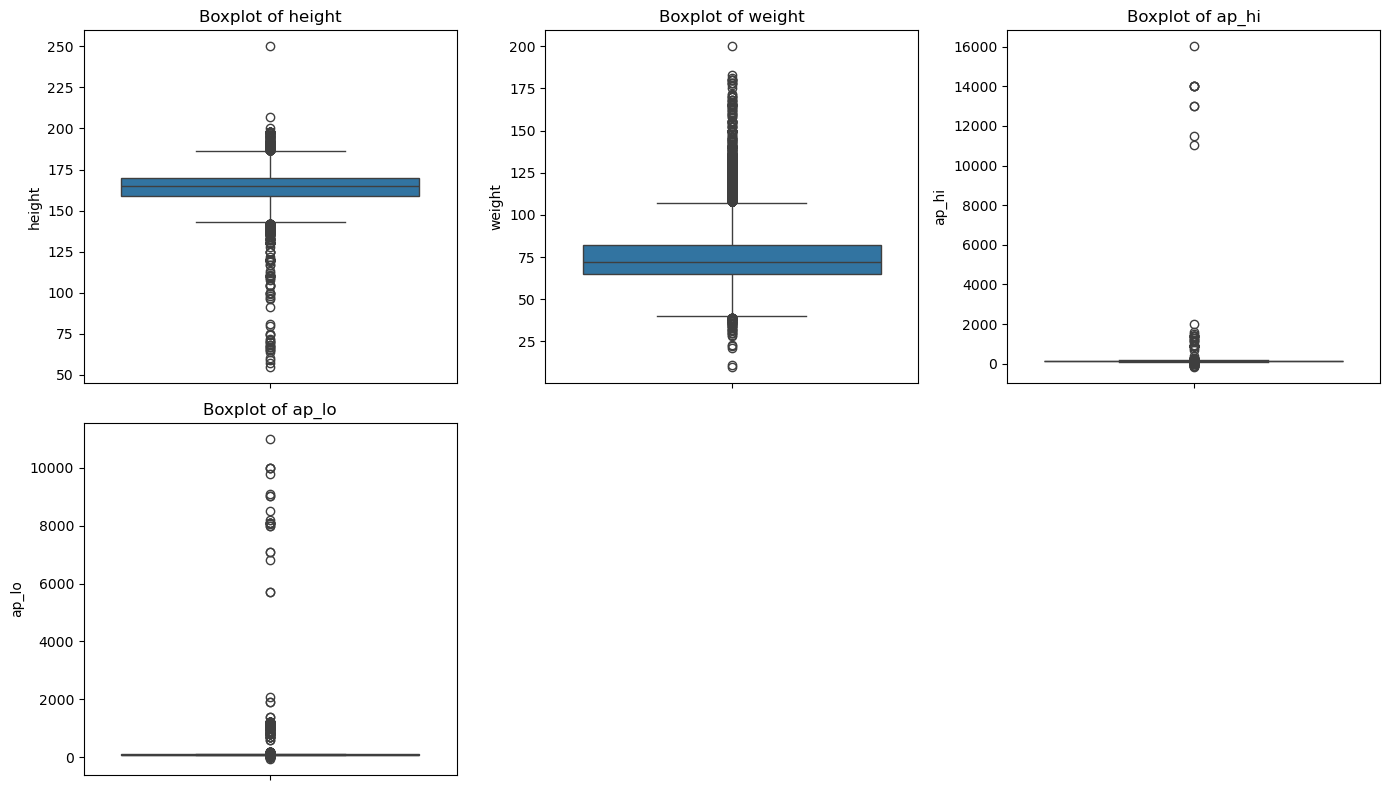

In [93]:
numeric_cols = ['height', 'weight', 'ap_hi', 'ap_lo']

plt.figure(figsize=(14, 8))

# Create a boxplot for each numeric column
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [127]:
def iqr_range(df, label):
    Q1, Q3 = df[label].quantile([0.25,0.75])
    IQR = Q3-Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return lower, upper

In [129]:
min_weight, max_weight = iqr_range(df,"weight")
min_height, max_height = iqr_range(df,"height")
min_ap_hi, max_ap_hi = iqr_range(df,"ap_hi")
min_ap_lo, max_ap_lo = iqr_range(df,"ap_lo")

df = df[df['weight'].between(min_weight, max_weight)&df['height'].between(min_height, max_height)&df['ap_hi'].between(min_ap_hi, max_ap_hi)&df['ap_lo'].between(min_ap_lo, max_ap_lo) ]

df.shape

(61884, 12)

### Feature Reducion

##### Convering Age into bins

In [99]:
df["age"].describe()

count    61884.000000
mean        53.406312
std          6.735683
min         29.750685
25%         48.558219
50%         54.021918
75%         58.465753
max         64.967123
Name: age, dtype: float64

In [131]:

bins = [29, 35, 40, 45, 50, 55, 60, 65]  # Upper bound is exclusive
# labels = ["30-35", "35-40", "40-45", "45-50", "50-55", "55-60", "60-65"]
labels= [0, 1, 2, 3, 4, 5, 6]
df["Age_class"] = pd.cut(df["age"], bins=bins, labels=labels, right=False)


##### Calculating BMI and creating bins of BMI

In [133]:
df["height"] = df["height"] / 100  # Convert height from cm to meters
df["BMI"] = df["weight"] / (df["height"] ** 2) 

In [105]:
df["BMI"].describe()

count    61884.000000
mean        27.118655
std          4.567195
min         13.520822
25%         23.875115
50%         26.233556
75%         29.760838
max         50.891795
Name: BMI, dtype: float64

In [135]:
bins = [13, 20, 25, 30, 35, 40, 45, 51]  # Upper bound is exclusive
# # labels = ["15-20", "20-25", "25-30", "30-35", "35-40", "40-45", "45-50","50-55"]
labels=[0, 1, 2, 3, 4, 5, 6]

df["BMI_class"] = pd.cut(df["BMI"], bins=bins, labels=labels, right=False)
df = df.drop(columns=["BMI"])


In [109]:
df.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
BMI_class      0
dtype: int64

In [137]:
df["map"] = (2*df["ap_lo"] + df["ap_hi"])/3

In [113]:
df["map"].describe()

count    61884.000000
mean        96.604270
std          9.123339
min         73.333333
25%         93.333333
50%         93.333333
75%        103.333333
max        126.000000
Name: map, dtype: float64

In [139]:
bins = [70, 80, 90, 100,110,127]  # Upper bound is exclusive
# labels = ["70-80", "80-90", "90-100", "100-110","110-120"]
labels=[0, 1, 2, 3, 4]

df["MAP_class"] = pd.cut(df["map"], bins=bins, labels=labels, right=False)
df = df.drop(columns=["map"])

In [27]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age_class,BMI_class,MAP_class
0,61.558904,1,1.55,69.0,130,80,2,2,0,0,1,0,6,2,2
1,40.131507,1,1.63,71.0,110,70,1,1,0,0,1,1,2,2,1
2,60.002740,1,1.65,70.0,120,80,1,1,0,0,1,0,6,2,2
3,39.860274,2,1.65,85.0,120,80,1,1,1,1,1,0,1,3,2
4,64.090411,1,1.55,62.0,120,80,1,1,0,0,1,0,6,2,2


In [141]:
df = df.drop(columns=["age"])
df = df.drop(columns=["ap_lo"])
df = df.drop(columns=["ap_hi"])
df = df.drop(columns=["height"])
df = df.drop(columns=["weight"])

In [29]:
df.head()

,gender,cholesterol,gluc,smoke,alco,active,cardio,Age_class,BMI_class,MAP_class
0,1,2,2,0,0,1,0,6,2,2
1,1,1,1,0,0,1,1,2,2,1
2,1,1,1,0,0,1,0,6,2,2
3,2,1,1,1,1,1,0,1,3,2
4,1,1,1,0,0,1,0,6,2,2


### Clustering

In [143]:

categorical_columns = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 
                       'cardio', 'Age_class', 'BMI_class', 'MAP_class']

# Extract categorical data
cat_data = df[categorical_columns]

# Initialize K-Modes (choose number of clusters, e.g., 3)
km = KModes(n_clusters=2, init='Huang', n_init=5, verbose=1)

# Fit the model and get cluster labels
clusters = km.fit_predict(cat_data)

# Add cluster labels to your original DataFrame
df['cluster'] = clusters


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 20780, cost: 175828.0
Run 1, iteration: 2/100, moves: 1047, cost: 175828.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 18895, cost: 178670.0
Run 2, iteration: 2/100, moves: 2040, cost: 178670.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 10193, cost: 175565.0
Run 3, iteration: 2/100, moves: 2873, cost: 175565.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 14184, cost: 175565.0
Run 4, iteration: 2/100, moves: 1348, cost: 175565.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 24433, cost: 177599.0
Best run was number 3


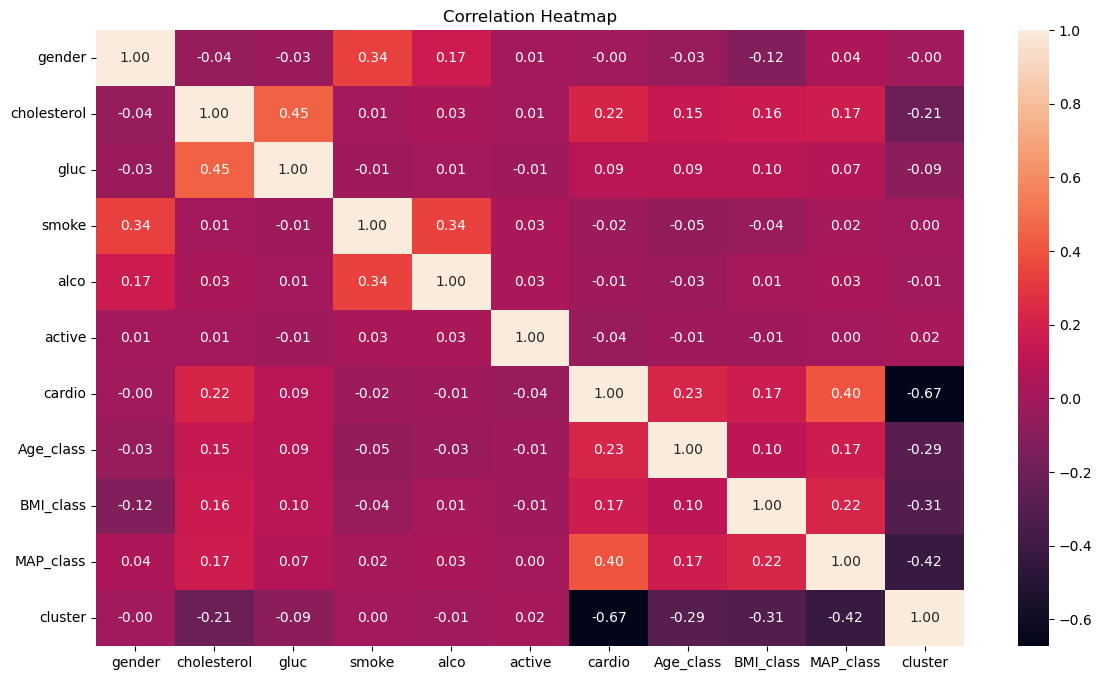

In [32]:
corr_matrix = df.corr()

plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [145]:
df.isna().sum()

gender         0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
Age_class      0
BMI_class      0
MAP_class      0
cluster        0
dtype: int64

In [33]:
df_male = df[df["gender"]==1]
df_female = df[df["gender"]==2]

In [34]:
df_male.shape[0] + df_female.shape[0]

61884

In [35]:
from sklearn.model_selection import train_test_split

#### Descision Tree

In [37]:
inputs = df_male.drop('cardio',axis='columns')

target=df_male["cardio"]
X_train,X_test,Y_train,Y_test=train_test_split(inputs,target,test_size=0.2)

In [38]:
from sklearn import tree
model=tree.DecisionTreeClassifier()

In [39]:
model.fit(X_train,Y_train)

C:\Users\rajar\anaconda3\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


DecisionTreeClassifier()

In [40]:
model.score(X_test,Y_test)

C:\Users\rajar\anaconda3\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


0.8552827380952381

### Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

C:\Users\rajar\anaconda3\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


RandomForestClassifier()

In [43]:
from sklearn.metrics import classification_report, accuracy_score
Y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))

Accuracy: 0.8561507936507936


C:\Users\rajar\anaconda3\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


### XG Boost

In [45]:
from xgboost import XGBClassifier
xg = XGBClassifier(use_label_encoder=False, eval_metric='logloss',enable_categorical=True, eta=0.01)
xg.fit(X_train, Y_train)

C:\Users\rajar\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:40:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eta=0.01, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, ...)

In [46]:
Y_pred = xg.predict(X_test)

In [47]:
print("Accuracy:", accuracy_score(Y_test, Y_pred))
# print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

Accuracy: 0.8606150793650794


### MLP

In [49]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    learning_rate_init=0.01,
    alpha=0.0001,
    early_stopping=True,
    validation_fraction=0.1,
    max_iter=500,
    random_state=42
)
mlp.fit(X_train, Y_train)

C:\Users\rajar\anaconda3\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


MLPClassifier(early_stopping=True, hidden_layer_sizes=(128, 64),
              learning_rate_init=0.01, max_iter=500, random_state=42)

In [50]:
Y_pred = mlp.predict(X_test)

C:\Users\rajar\anaconda3\Lib\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


In [51]:
print("Accuracy:", accuracy_score(Y_test, Y_pred))

Accuracy: 0.8504464285714286
